In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the CSV file
file_path = 'Football Data.csv'
football_data = pd.read_csv(file_path)

# Data Cleaning and Preparation
football_data.rename(columns={'antecedent': 'Situation', 'antecedent:confidence': 'Confidence'}, inplace=True)
football_data.fillna('Unknown', inplace=True)

# Verify data structure and contents
print("Data Preview:")
print(football_data.head())
print("Data Info:")
print(football_data.info())

# Calculate the frequency of each action
action_columns = ['option1', 'option2', 'option3', 'option4', 'option5']
action_counts = football_data[action_columns].melt().value.value_counts().reset_index()
action_counts.columns = ['Action', 'Frequency']

# Verify action counts
print("Action Counts:")
print(action_counts)

# Calculate the average confidence level for each action
confidence_per_action = football_data.melt(id_vars=['Confidence'], value_vars=action_columns)
confidence_per_action.columns = ['Confidence', 'variable', 'Action']  # rename columns for clarity
average_confidence = confidence_per_action.groupby('Action')['Confidence'].mean().reset_index()
average_confidence.columns = ['Action', 'Average_Confidence']

# Verify average confidence
print("Average Confidence Levels:")
print(average_confidence)

# Identify the top situations leading to each action
top_situations = football_data.melt(id_vars=['Situation'], value_vars=action_columns)
top_situations.columns = ['Situation', 'variable', 'Action']  # rename columns for clarity
top_situations_count = top_situations.value_counts(['Situation', 'Action']).reset_index(name='Count')

# Verify top situations
print("Top Situations:")
print(top_situations_count)

# Save the transformed data to CSV files for import into Power BI
action_counts.to_csv('Action_Frequency.csv', index=False)
average_confidence.to_csv('Average_Confidence.csv', index=False)
top_situations_count.to_csv('Top_Situations.csv', index=False)

Data Preview:
    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  831005673    False   finalized                   5    11/20/15 20:20   
1  831005674    False   finalized                   5    11/18/15 21:59   
2  831005675    False   finalized                   5    11/20/15 22:43   
3  831005676    False   finalized                   5     11/19/15 7:41   
4  831005677    False   finalized                   5     11/21/15 8:01   

           Situation  Confidence  \
0  kick a field goal      0.8092   
1  kick a field goal      1.0000   
2  kick a field goal      0.6211   
3  kick a field goal      0.8073   
4  kick a field goal      1.0000   

                                     orig_antecedent antecedent_gold option1  \
0  It is first down and 10. The ball is on your o...         Unknown    punt   
1  It is second down and inches. The ball is on y...         Unknown    punt   
2  It is second down and inches. The ball is on y...         Unknown    punt  

In [13]:
# Display the head of each transformed dataframe to ensure correctness
print("Action Frequency:")
print(action_counts.head())

Action Frequency:
               Action  Frequency
0                punt       3730
1   kick a field goal       3730
2                 run       3730
3                pass       3730
4          kneel down       3730


In [11]:
print("Average Confidence:")
print(average_confidence.head())

Average Confidence:
               Action  Average_Confidence
0   kick a field goal            0.759839
1          kneel down            0.759839
2                pass            0.759839
3                punt            0.759839
4                 run            0.759839


In [7]:
print("Top Situations:")
print(top_situations_count.head())

Top Situations:
  Situation              Action  Count
0      pass   kick a field goal   1339
1      pass          kneel down   1339
2      pass                 run   1339
3      pass                punt   1339
4      pass                pass   1339


           _unit_id  _trusted_judgments   Confidence
count  3.730000e+03         3730.000000  3730.000000
mean   8.310115e+08            6.110992     0.759839
std    4.918375e+04           13.814715     0.190108
min    8.310057e+08            5.000000     0.210700
25%    8.310066e+08            5.000000     0.603600
50%    8.310075e+08            5.000000     0.798700
75%    8.310085e+08            5.000000     1.000000
max    8.316283e+08          187.000000     1.000000


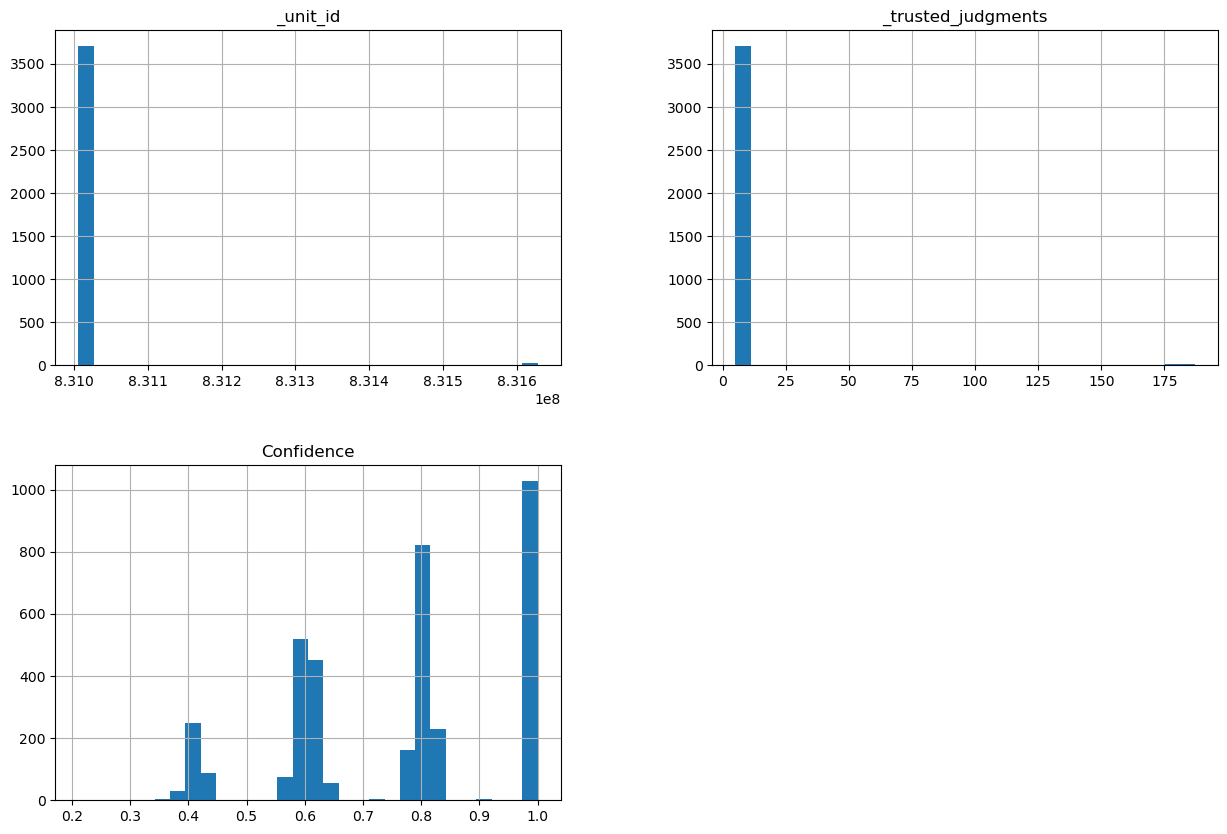

In [24]:
print(football_data.describe())
football_data.hist(bins=30, figsize=(15, 10))
plt.show()